In [201]:
import scipy.stats as stats
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [202]:
file = pd.read_csv("./test.csv")

In [203]:
review_count = file["review_count"]
review_count_zscore = stats.zscore(review_count)

In [204]:
review_count_zscore

0      0.009657
1      0.305101
2     -0.171302
3     -0.152837
4     -0.150990
         ...   
195   -0.145450
196   -0.169455
197   -0.150990
198   -0.123292
199   -0.186074
Name: review_count, Length: 200, dtype: float64

In [205]:
review_count_minmax = review_count.copy()

In [206]:
for i in range(len(review_count_minmax)):
    review_count_minmax[i] = (review_count_minmax[i] - min(review_count)) / (max(review_count) - min(review_count))

In [207]:
review_count_minmax

0      0.014677
1      0.035832
2      0.001719
3      0.003041
4      0.003173
         ...   
195    0.003570
196    0.001851
197    0.003173
198    0.005157
199    0.000661
Name: review_count, Length: 200, dtype: float64

In [208]:
def parsehours(h):
    if type(h) is float:
        return 0
    total = 0
    all_days = h.split(',')
    for day in all_days:
        times = day.split("-")
        times[0] = times[0].split('\'')[3]
        times[1] = times[1].replace('\'', '')
        times[1] = times[1].replace('}', '')
        time1 = datetime.strptime(times[0], "%H:%M")
        time2 = datetime.strptime(times[1], "%H:%M")
        total += (time2 - time1).seconds/3600
    return total

In [209]:
hours = file["hours"]
hoursparsed = [0]*len(hours)
hoursparsedDict = {}

In [210]:
hours

0      {'Monday': '5:0-20:0', 'Tuesday': '5:0-20:0', ...
1      {'Monday': '0:0-0:0', 'Tuesday': '11:0-20:30',...
2                                                    NaN
3      {'Monday': '10:30-21:0', 'Tuesday': '10:30-21:...
4      {'Monday': '11:0-18:30', 'Tuesday': '11:0-18:3...
                             ...                        
195    {'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ...
196    {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...
197    {'Friday': '10:0-17:30', 'Saturday': '10:0-17:...
198    {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...
199    {'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21...
Name: hours, Length: 200, dtype: object

In [211]:
for i in range(len(hours)):
    value = parsehours(hours[i])
    if value in hoursparsedDict:
        hoursparsedDict[value] +=1
    else:
        hoursparsedDict[value] = 1
    hoursparsed[i] = value

IndexError: list index out of range

In [213]:
hoursparsedDict

{105.0: 5,
 57.0: 3,
 0: 28,
 72.5: 1,
 45.0: 3,
 72.0: 6,
 24.5: 1,
 95.0: 1,
 77.0: 3,
 52.0: 2,
 40.0: 2,
 32.5: 1,
 37.5: 1,
 45.5: 1,
 52.5: 1,
 75.0: 2,
 60.0: 4,
 74.0: 2,
 59.0: 4,
 76.0: 4,
 112.0: 1,
 82.0: 1,
 50.5: 1,
 84.0: 3,
 28.5: 1,
 119.0: 1,
 66.0: 3,
 64.5: 2,
 51.25: 1,
 73.5: 4,
 78.5: 2,
 68.0: 3,
 76.5: 1,
 39.0: 1,
 57.5: 1,
 61.0: 2,
 79.0: 3,
 78.0: 4,
 65.5: 1,
 46.0: 1,
 90.0: 1,
 29.0: 1,
 93.0: 2,
 33.0: 2,
 32.0: 2,
 70.0: 4,
 83.0: 5,
 55.0: 2,
 81.5: 2,
 88.0: 2,
 35.0: 2,
 55.5: 1,
 99.0: 1,
 49.0: 1,
 63.0: 6,
 80.5: 1,
 67.0: 1,
 41.0: 2,
 23.0: 1,
 59.5: 1,
 44.0: 1,
 56.0: 2,
 51.5: 2,
 88.5: 1,
 67.5: 1,
 38.0: 1,
 68.5: 2,
 29.5: 1,
 89.0: 1,
 30.0: 1,
 62.0: 2,
 42.0: 2,
 51.0: 1,
 91.0: 1,
 65.0: 1,
 146.5: 1,
 14.5: 1,
 87.5: 1,
 114.0: 1,
 58.0: 2,
 82.5: 1,
 30.5: 1,
 92.0: 1,
 85.0: 2,
 54.0: 2,
 116.0: 1,
 101.0: 1,
 81.0: 2,
 128.0: 1,
 69.0: 1,
 71.0: 2,
 18.0: 1,
 50.0: 1,
 25.0: 1,
 85.5: 1,
 100.0: 1,
 75.5: 1,
 22.5: 1}

([<matplotlib.axis.XTick at 0x1b3f79c5a20>,
 [Text(0, 0, '105.0'),
  Text(1, 0, '57.0'),
  Text(2, 0, '0'),
  Text(3, 0, '72.5'),
  Text(4, 0, '45.0'),
  Text(5, 0, '72.0'),
  Text(6, 0, '24.5'),
  Text(7, 0, '95.0'),
  Text(8, 0, '77.0'),
  Text(9, 0, '52.0'),
  Text(10, 0, '40.0'),
  Text(11, 0, '32.5'),
  Text(12, 0, '37.5'),
  Text(13, 0, '45.5'),
  Text(14, 0, '52.5'),
  Text(15, 0, '75.0'),
  Text(16, 0, '60.0'),
  Text(17, 0, '74.0'),
  Text(18, 0, '59.0'),
  Text(19, 0, '76.0'),
  Text(20, 0, '112.0'),
  Text(21, 0, '82.0'),
  Text(22, 0, '50.5'),
  Text(23, 0, '84.0'),
  Text(24, 0, '28.5'),
  Text(25, 0, '119.0'),
  Text(26, 0, '66.0'),
  Text(27, 0, '64.5'),
  Text(28, 0, '51.25'),
  Text(29, 0, '73.5'),
  Text(30, 0, '78.5'),
  Text(31, 0, '68.0'),
  Text(32, 0, '76.5'),
  Text(33, 0, '39.0'),
  Text(34, 0, '57.5'),
  Text(35, 0, '61.0'),
  Text(36, 0, '79.0'),
  Text(37, 0, '78.0'),
  Text(38, 0, '65.5'),
  Text(39, 0, '46.0'),
  Text(40, 0, '90.0'),
  Text(41, 0, '29.0'),

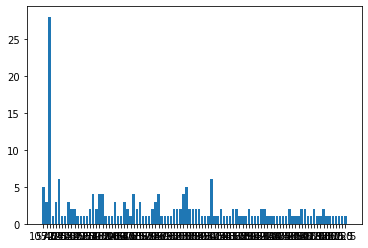

In [214]:
plt.bar(range(len(hoursparsedDict)), list(hoursparsedDict.values()), align='center')
plt.xticks(range(len(hoursparsedDict)), list(hoursparsedDict.keys()))

In [215]:
def toFrequencyDict(x):
    d = {}
    for value in x:
        if value in d:
            d[value] +=1
        else:
            d[value] = 1 
    return d

In [216]:
def dictToPlot(d):
    lists = sorted(d.items()) # sorted by key, return a list of tuples

    x, y = zip(*lists) # unpack a list of pairs into two tuples

    plt.plot(x, y)
    plt.show()

In [230]:
hours_zscore = [0]*len(hoursparsed)
hours_minmax = [0]*len(hoursparsed)

In [231]:
hours_zscore = stats.zscore(hoursparsed)

In [232]:
hours_zscore

array([ 1.62883802e+00, -3.24594992e-01,  3.06201084e-01, -8.12953244e-01,
        2.85852824e-01, -1.64723193e+00,  1.22187281e+00,  4.89335429e-01,
       -5.28077597e-01, -1.01643585e+00, -1.32165976e+00, -1.11817715e+00,
       -7.92604984e-01, -5.07729337e-01,  4.07942387e-01, -2.02505429e-01,
        3.67245866e-01, -2.43201950e-01,  4.48638908e-01,  1.62883802e+00,
        1.91371367e+00,  6.92818034e-01, -5.89122379e-01,  7.74211076e-01,
       -1.48444584e+00,  2.19858931e+00,  4.16736974e-02, -1.93710842e-02,
       -5.58599988e-01,  3.46897605e-01,  5.50380210e-01,  1.23066739e-01,
        4.68987168e-01, -1.05713237e+00, -3.04246731e-01, -2.43201950e-01,
       -1.01643585e+00,  3.46897605e-01, -1.61808908e-01, -8.12953244e-01,
        5.70728471e-01,  5.30031950e-01,  2.13254369e-02,  4.89335429e-01,
       -7.72256723e-01,  1.01839020e+00, -1.46409758e+00,  1.14047977e+00,
       -1.30131150e+00, -1.34200802e+00,  2.85852824e-01,  2.04459782e-01,
        7.33514555e-01, -

In [233]:
for i in range(len(hoursparsed)):
    hours_minmax[i] = (hoursparsed[i] - min(hoursparsed)) / (max(hoursparsed) - min(hoursparsed))

In [234]:
len(hours_minmax)

177

In [227]:
df = pd.DataFrame({'review_count original': review_count,
                  'review_count z-score': review_count_zscore,
                  'review_count min-max': review_count_minmax,
                  'hours original': hoursparsed,
                  'hours z-score': hours_zscore,
                  'hours min-max': hours_minmax})

ValueError: All arrays must be of the same length

In [200]:
pathanme = "C:/Users/George/Documents/100131001-100131002—T3.csv"
df.to_csv(pathanme, index=False)

PermissionError: [Errno 13] Permission denied: 'C:/Users/George/Documents/100131001-100131002—T3.csv'

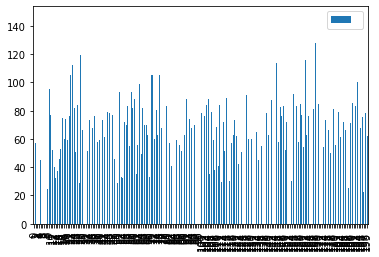

In [102]:
df = pd.DataFrame(hoursparsed, columns=[''])
ax = df.plot.bar()

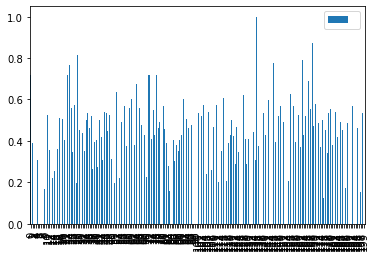

In [100]:
df = pd.DataFrame(hours_minmax, columns=[''])
ax = df.plot.bar() 

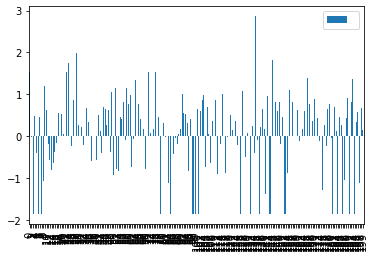

In [101]:
df = pd.DataFrame(hours_zscore, columns=[''])
ax = df.plot.bar()

In [137]:
d = toFrequencyDict(hoursparsed)


AttributeError: 'dict' object has no attribute 'sort'

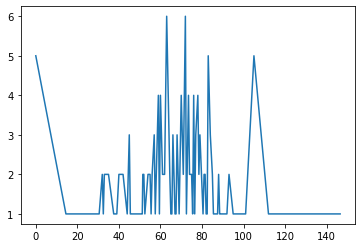

In [239]:
hoursDict = toFrequencyDict(hoursparsed)
# del hoursDict[0]
dictToPlot(hoursDict)

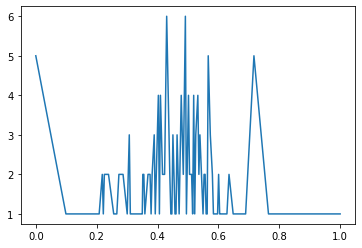

In [236]:

hoursDict = toFrequencyDict(hours_minmax)

dictToPlot(hoursDict)

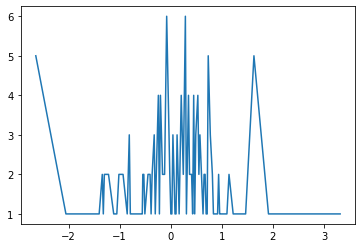

In [238]:
hoursDict = toFrequencyDict(hours_zscore)
dictToPlot(hoursDict)

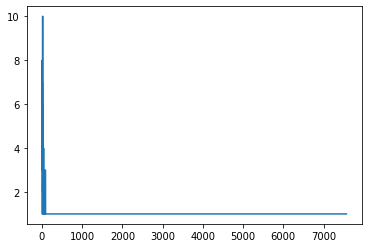

0      116
1      276
2       18
3       28
4       29
      ... 
195     32
196     19
197     29
198     44
199     10
Name: review_count, Length: 200, dtype: int64

In [162]:
d = toFrequencyDict(review_count)

review_count
dictToPlot(d)
review_count

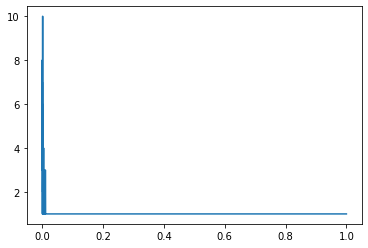

In [163]:
d = toFrequencyDict(review_count_minmax)
dictToPlot(d)

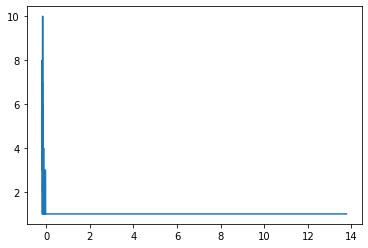

In [164]:
d = toFrequencyDict(review_count_zscore)
dictToPlot(d)